In [229]:
%reset 

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.stats.multitest
from enigmatoolbox.datasets import risk_genes
from matplotlib import pyplot as plt

In [3]:
data_dir = '/Users/ltran/Documents/Data/'

In [4]:

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

In [5]:
thick = ['L_bankssts', 'L_caudalanteriorcingulate', 'L_caudalmiddlefrontal',
       'L_cuneus', 'L_entorhinal', 'L_fusiform', 'L_inferiorparietal',
       'L_inferiortemporal', 'L_isthmuscingulate', 'L_lateraloccipital',
       'L_lateralorbitofrontal', 'L_lingual', 'L_medialorbitofrontal',
       'L_middletemporal', 'L_parahippocampal', 'L_paracentral',
       'L_parsopercularis', 'L_parsorbitalis', 'L_parstriangularis',
       'L_pericalcarine', 'L_postcentral', 'L_posteriorcingulate',
       'L_precentral', 'L_precuneus', 'L_rostralanteriorcingulate',
       'L_rostralmiddlefrontal', 'L_superiorfrontal', 'L_superiorparietal',
       'L_superiortemporal', 'L_supramarginal', 'L_frontalpole',
       'L_temporalpole', 'L_transversetemporal', 'L_insula', 'R_bankssts',
       'R_caudalanteriorcingulate', 'R_caudalmiddlefrontal', 'R_cuneus',
       'R_entorhinal', 'R_fusiform', 'R_inferiorparietal',
       'R_inferiortemporal', 'R_isthmuscingulate', 'R_lateraloccipital',
       'R_lateralorbitofrontal', 'R_lingual', 'R_medialorbitofrontal',
       'R_middletemporal', 'R_parahippocampal', 'R_paracentral',
       'R_parsopercularis', 'R_parsorbitalis', 'R_parstriangularis',
       'R_pericalcarine', 'R_postcentral', 'R_posteriorcingulate',
       'R_precentral', 'R_precuneus', 'R_rostralanteriorcingulate',
       'R_rostralmiddlefrontal', 'R_superiorfrontal', 'R_superiorparietal',
       'R_superiortemporal', 'R_supramarginal', 'R_frontalpole',
       'R_temporalpole', 'R_transversetemporal', 'R_insula']

## Import Z-Scores

In [102]:
Ztca = pd.read_csv(os.path.join(data_dir, 'Outputs/Z_tca_rdb.csv'))

In [29]:
Zasd = pd.read_csv(os.path.join(data_dir, 'Outputs/Z_asd_rdb.csv'))

## Plot CNVs

In [115]:
Ztca['Variants'] = 'No'

In [116]:
lid = ['137_tca', '143_tca', '162_tca', '196_tca']

In [117]:
Ztca.loc[Ztca.participant_id.isin(lid), 'Variants'] = 'CNV'

In [118]:
thick = [col for col in Ztca.columns if 'Z_predict' in col]

In [119]:
Ztca = Ztca[(Ztca.ASD == 'TCA_ac') | (Ztca.ASD == 'TCA_pr')| (Ztca.ASD == 'TCA')]

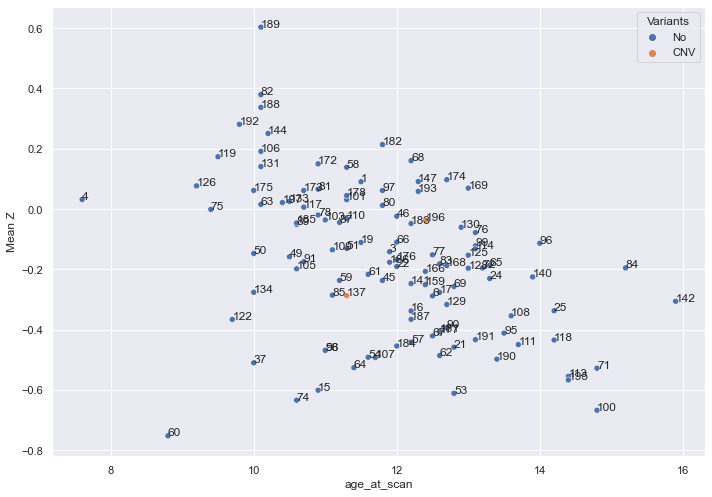

In [120]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(y = Ztca[thick].mean(axis = 1 ), x = Ztca['age_at_scan'], hue = Ztca['Variants'])
label_point(Ztca['age_at_scan'], Ztca[thick].mean(axis = 1 ), Ztca.participant_id.str.split('_', expand=True)[0], plt.gca())
plt.ylabel('Mean Z')
plt.show()

In [112]:
sns.set_theme(style='darkgrid')

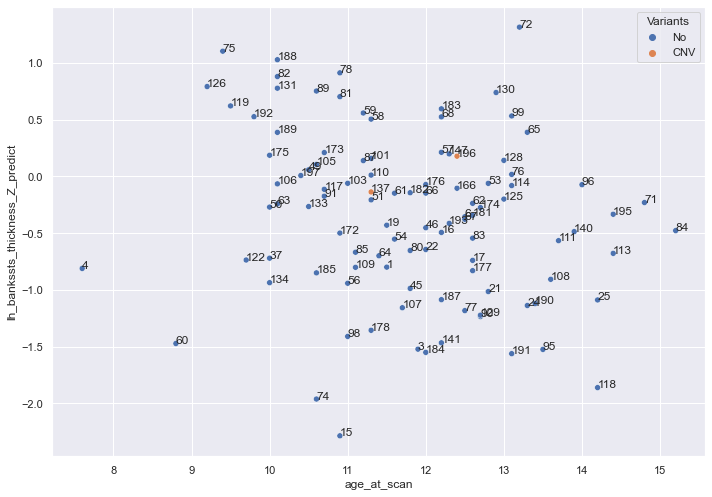

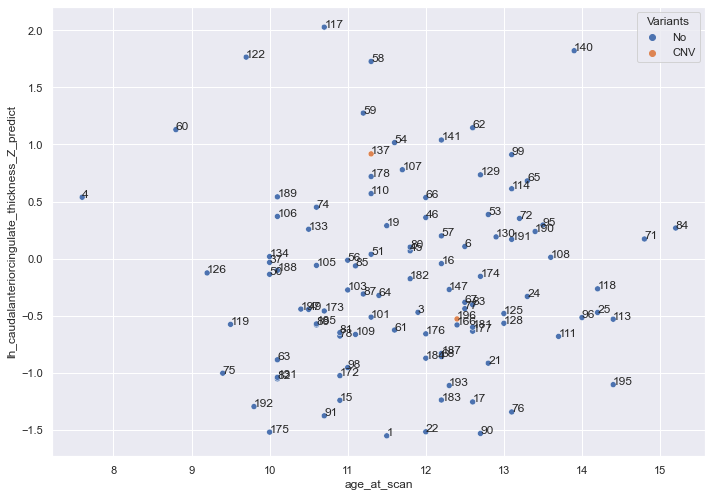

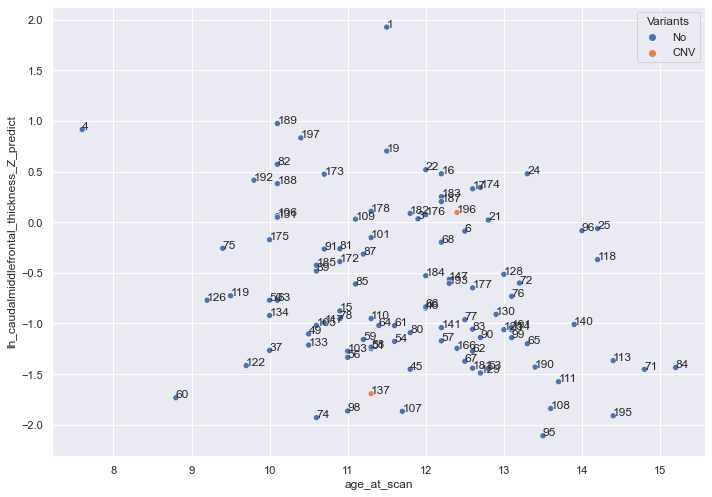

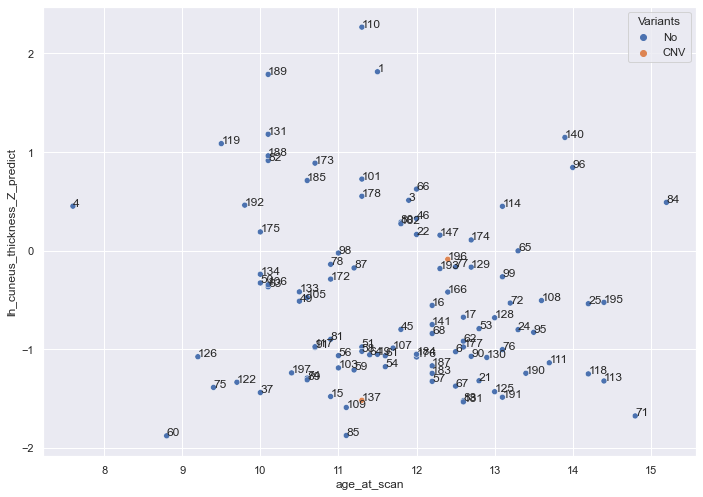

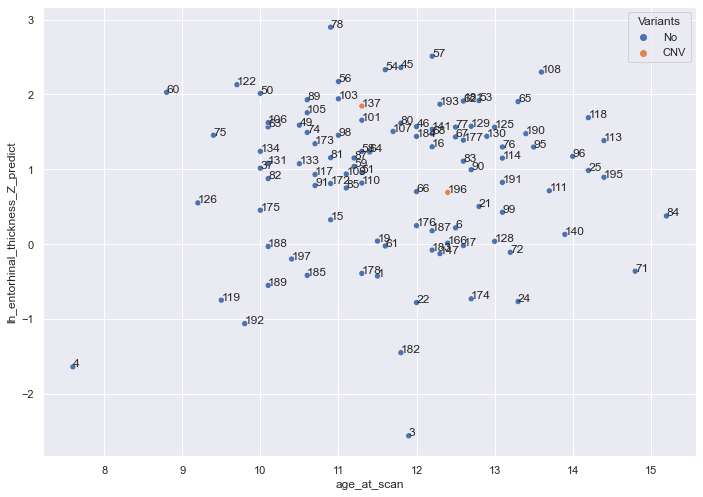

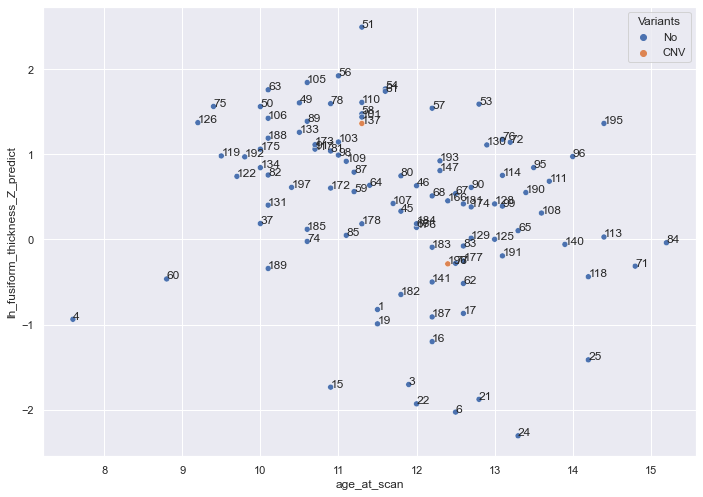

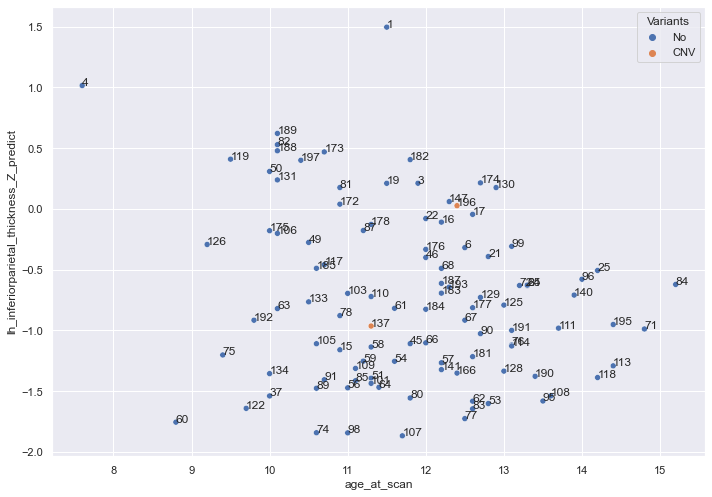

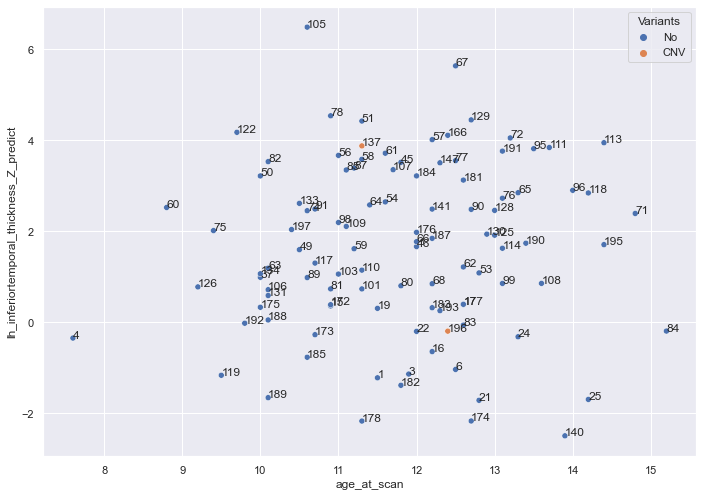

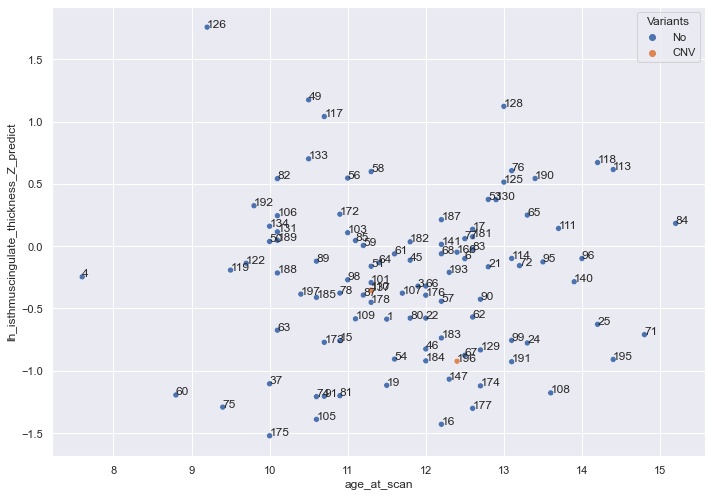

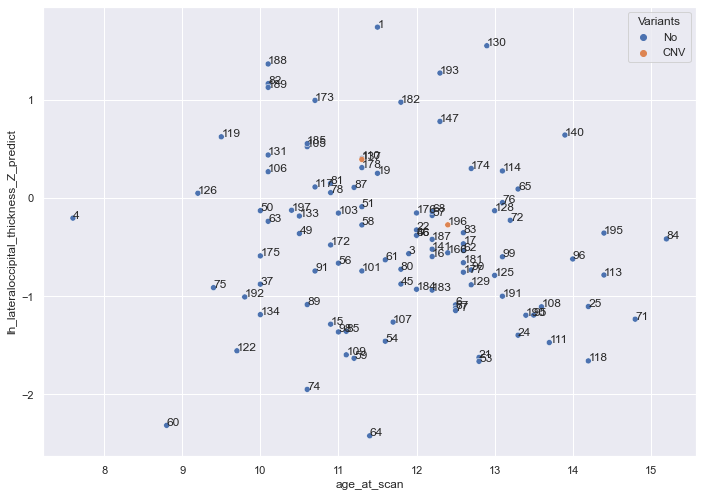

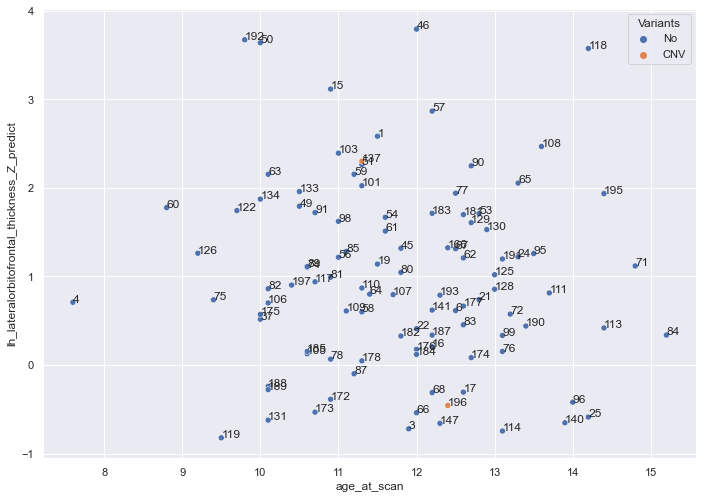

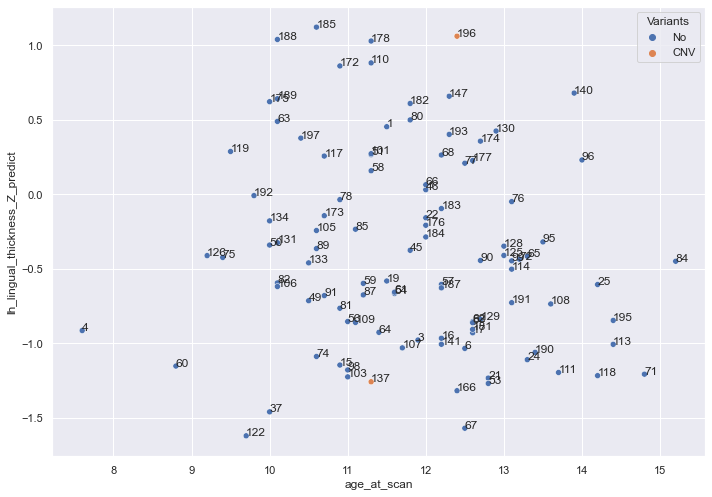

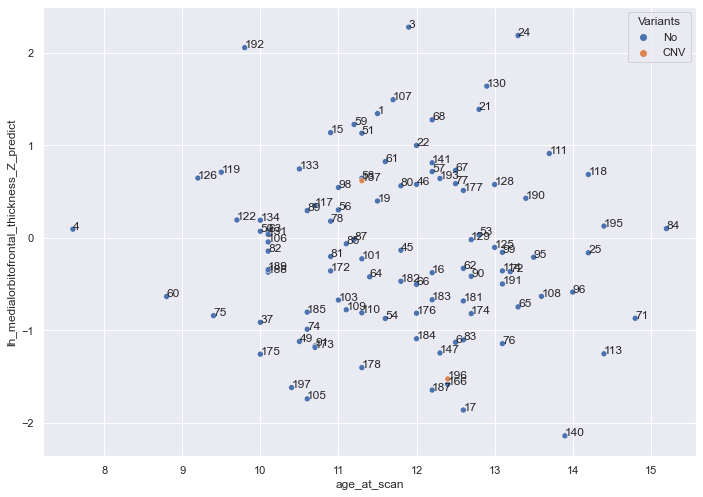

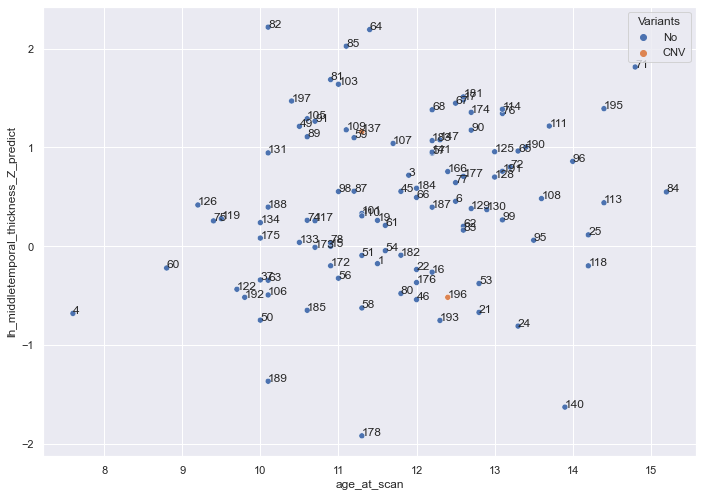

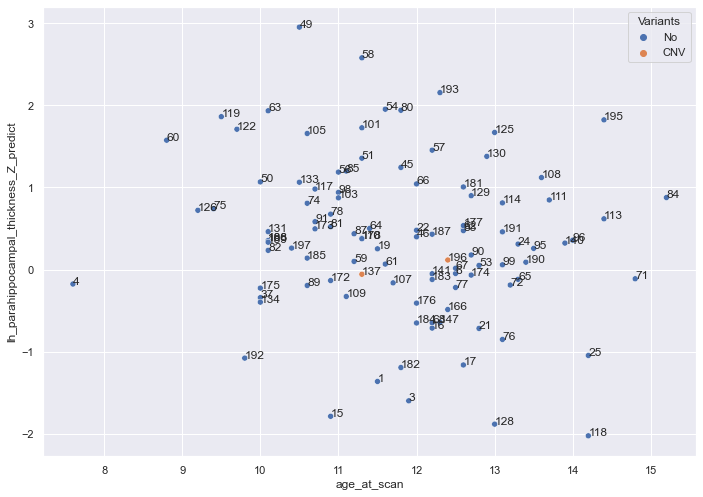

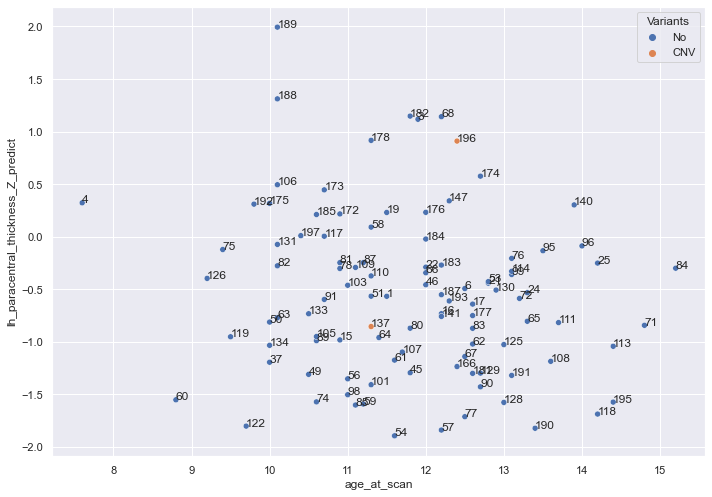

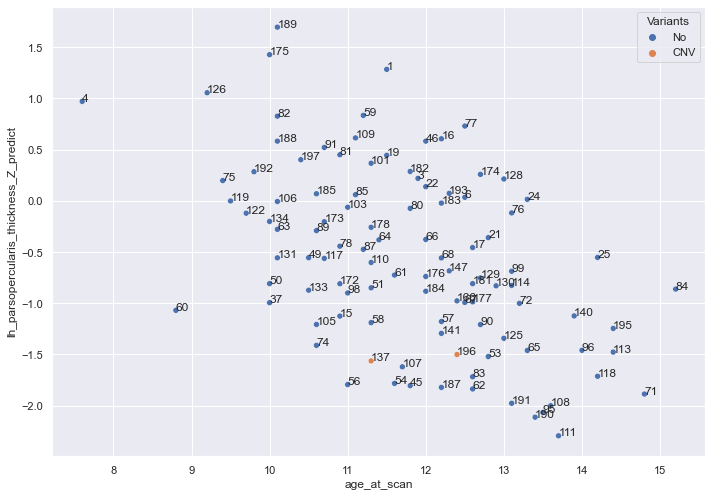

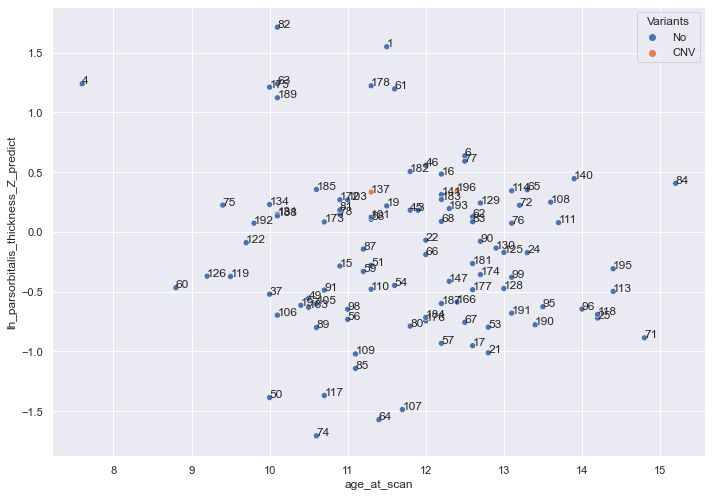

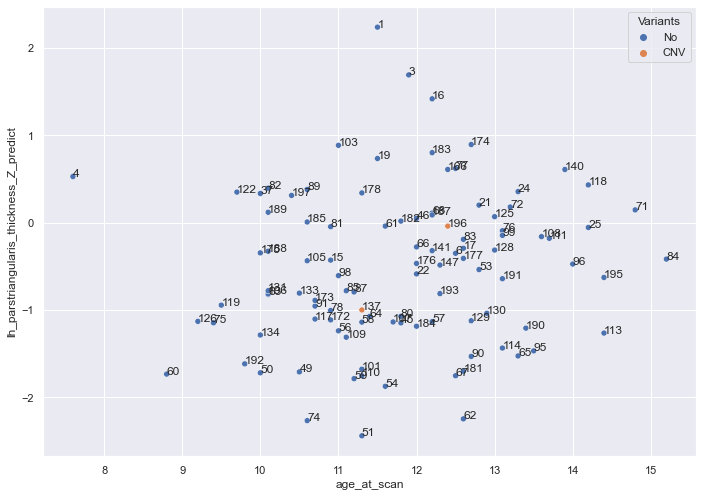

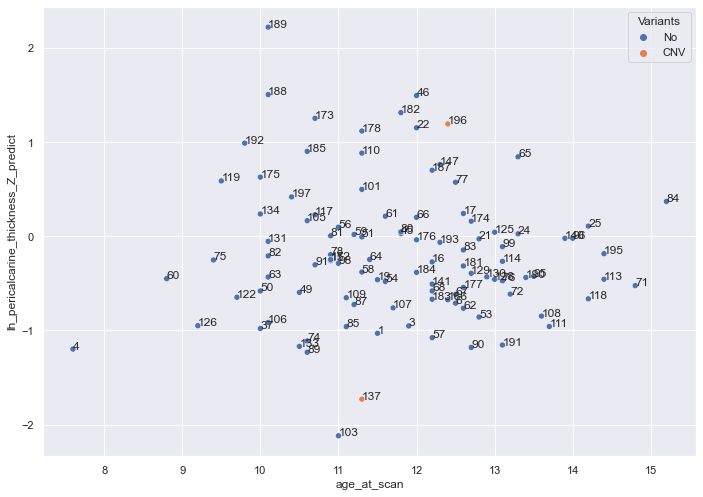

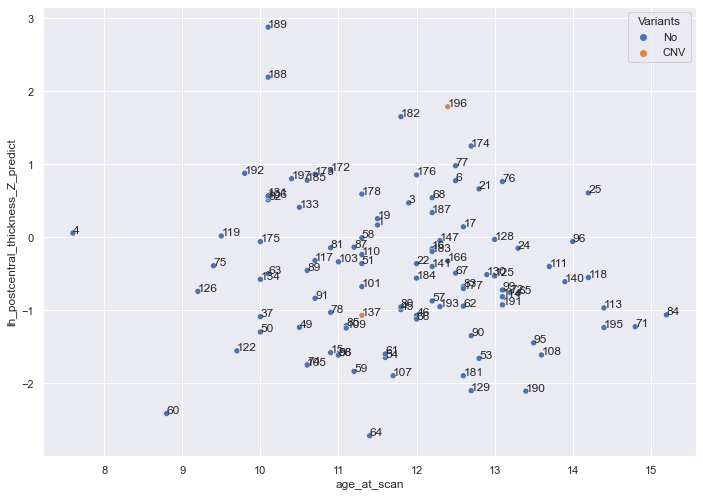

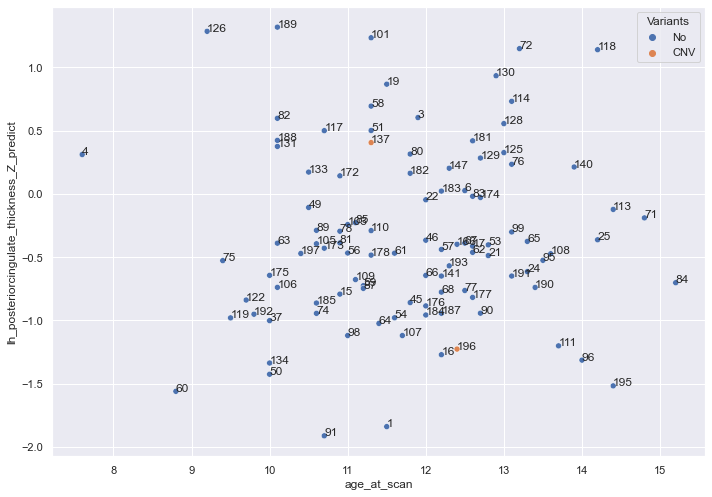

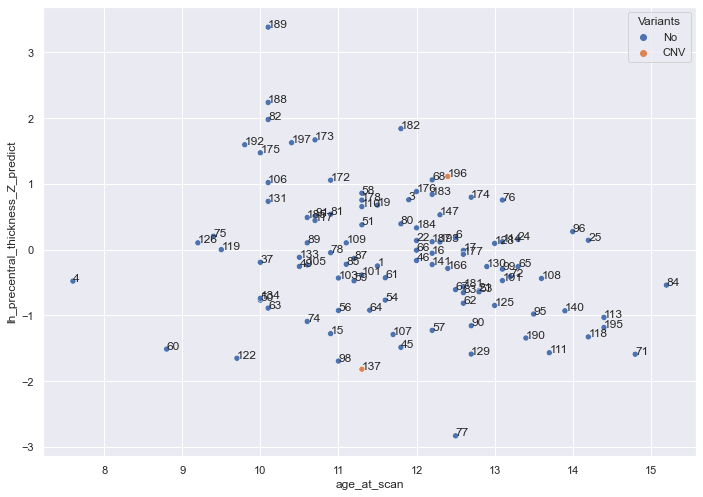

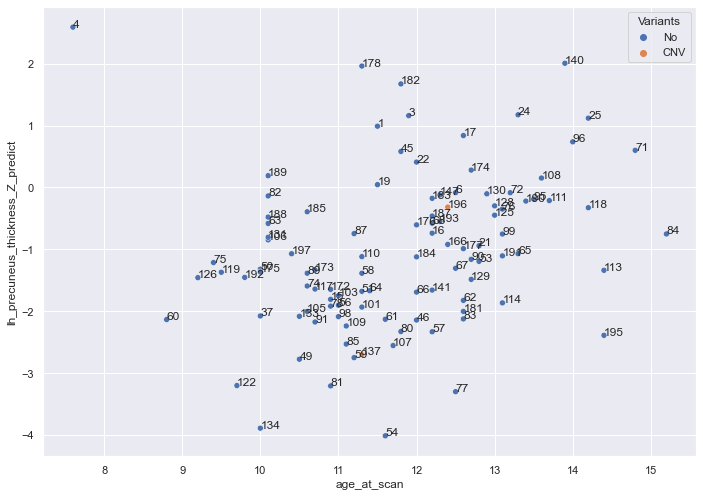

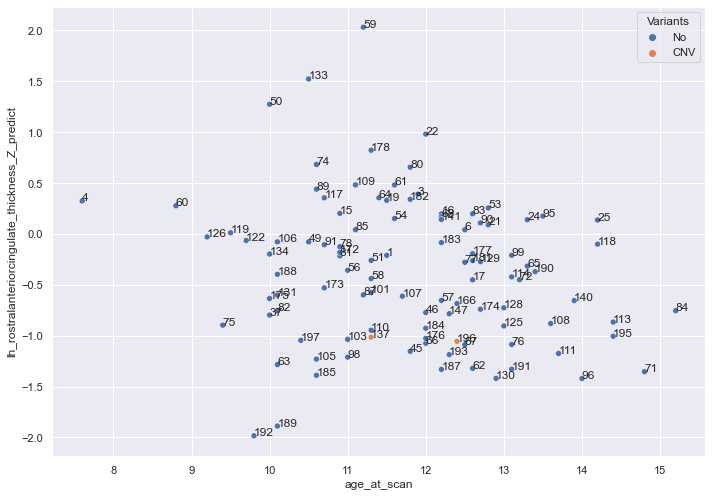

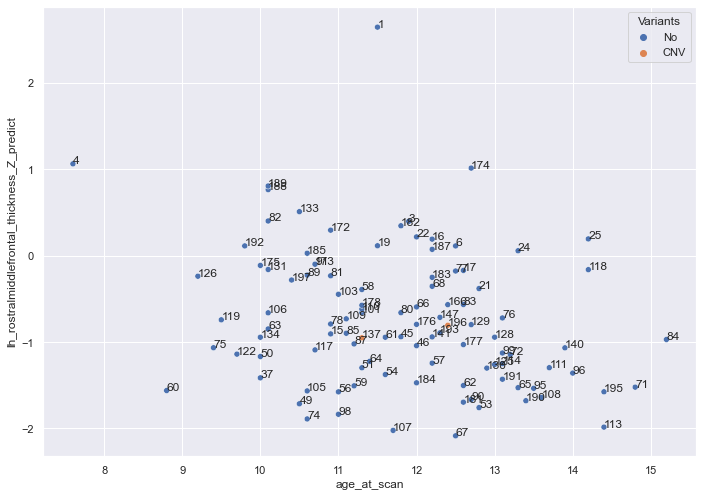

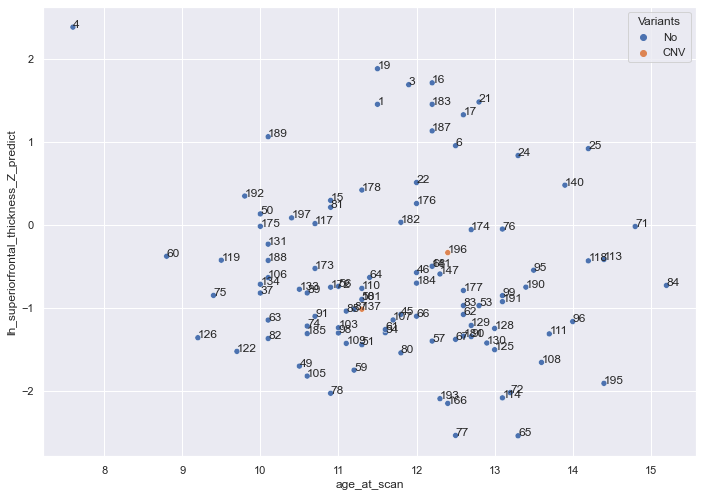

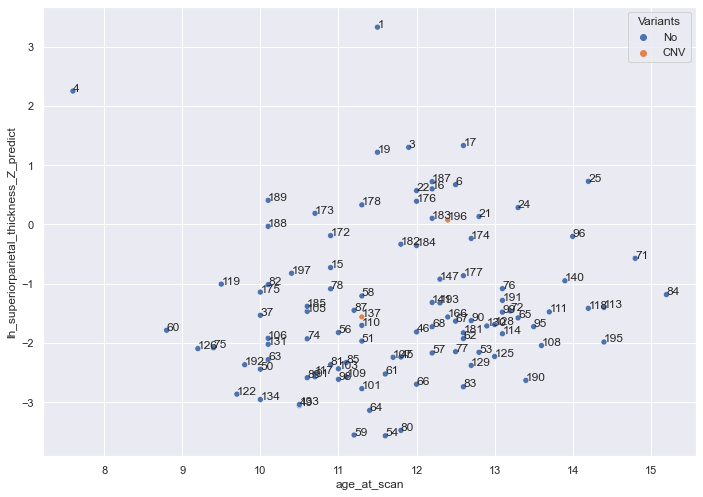

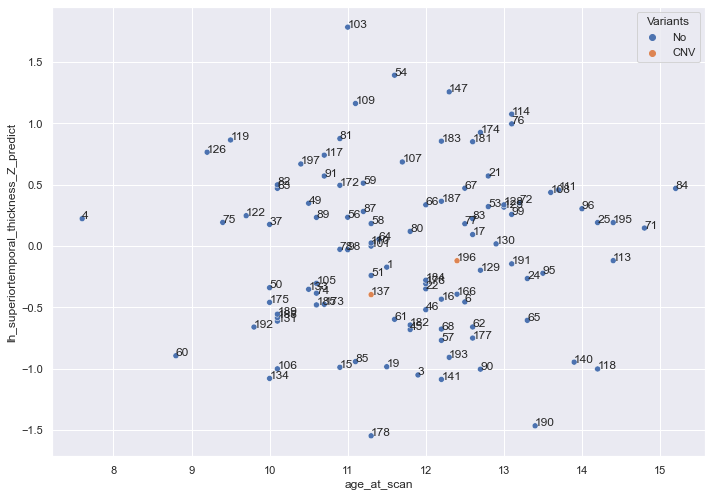

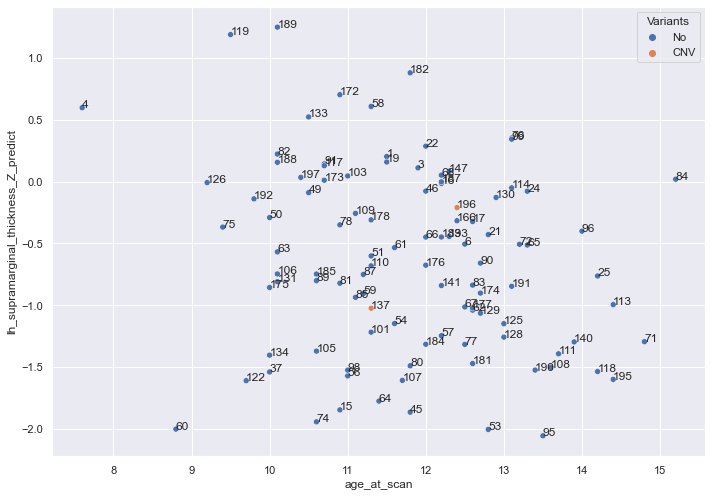

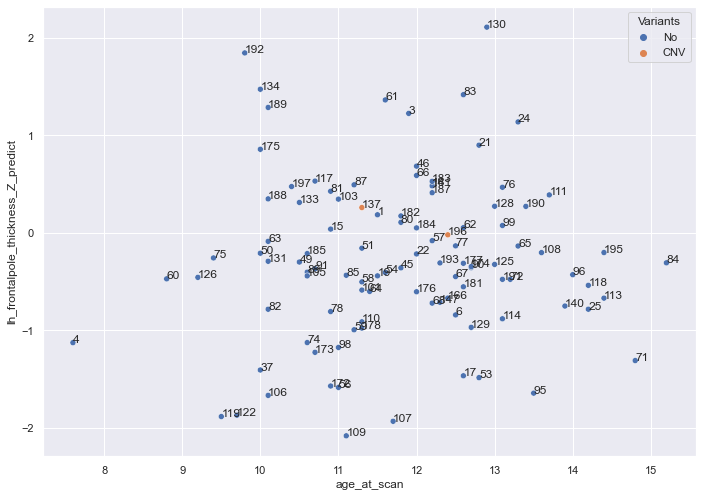

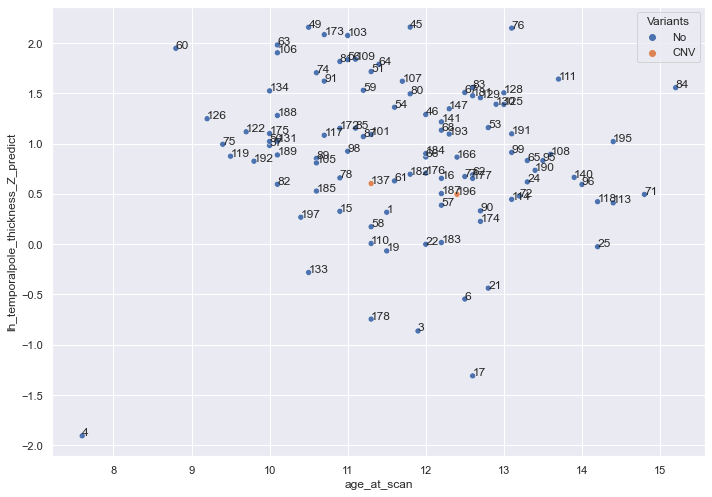

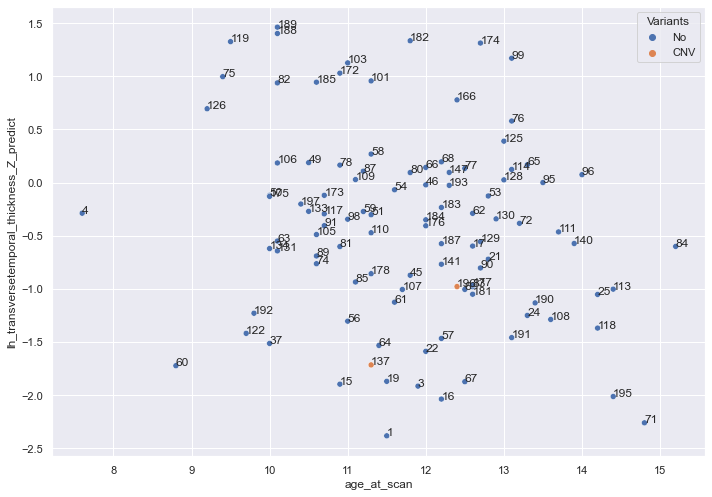

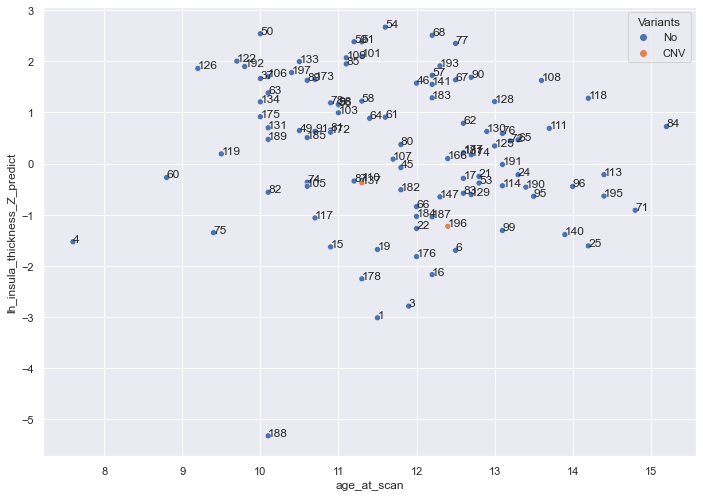

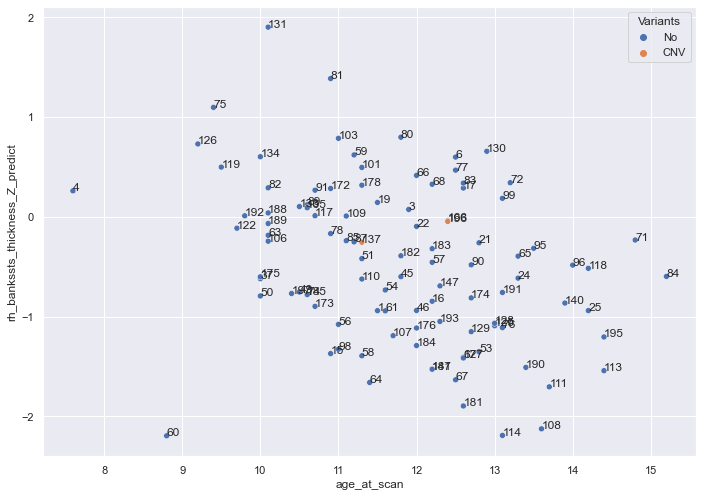

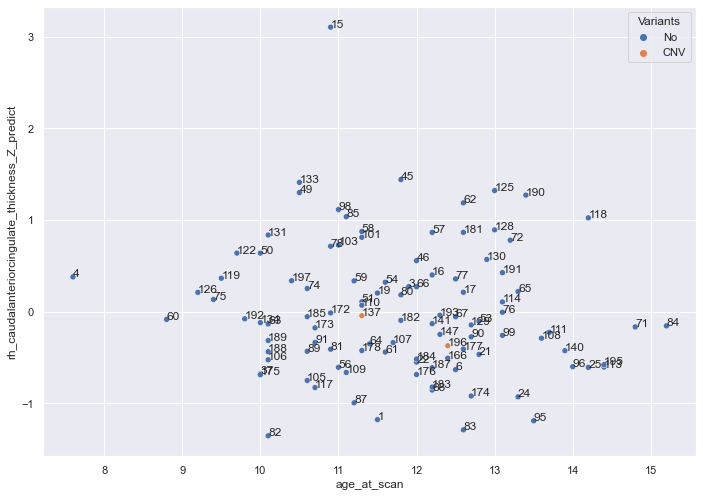

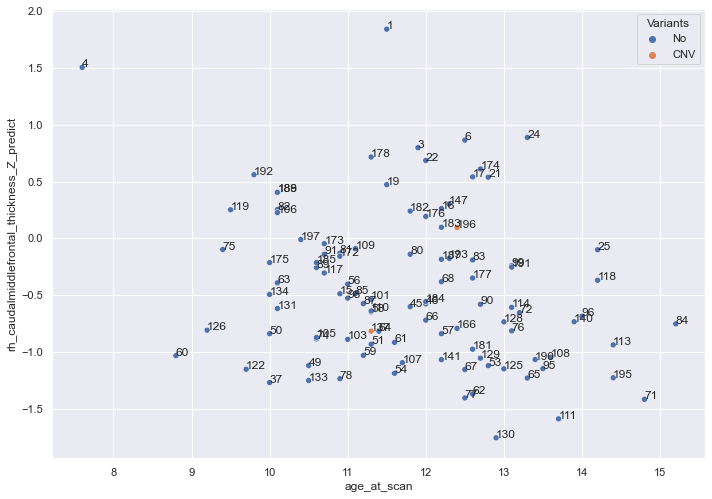

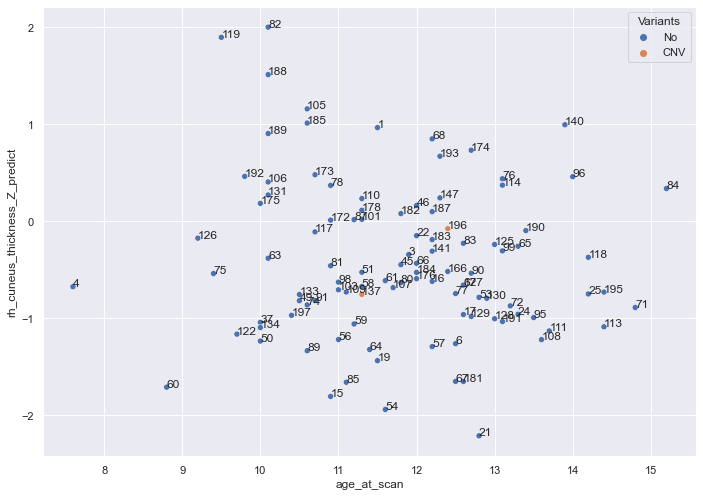

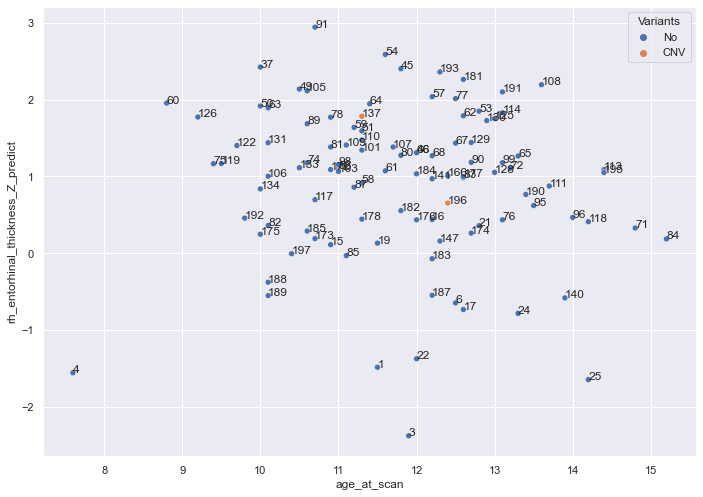

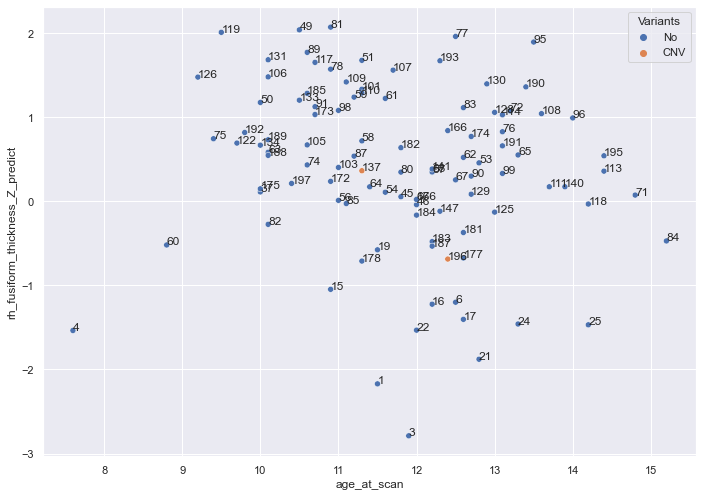

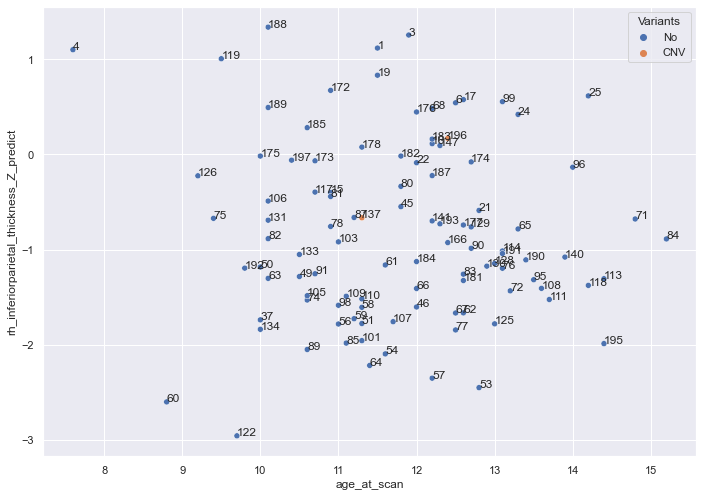

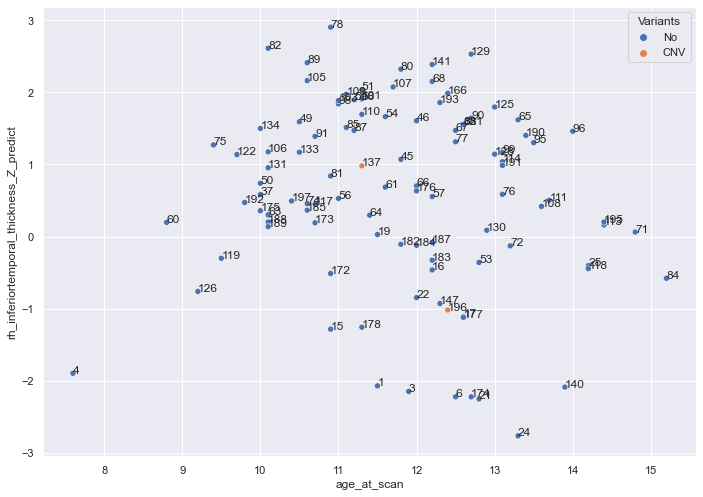

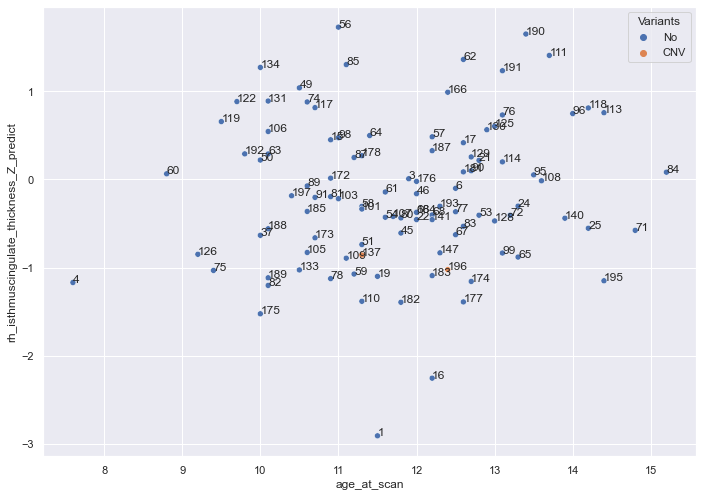

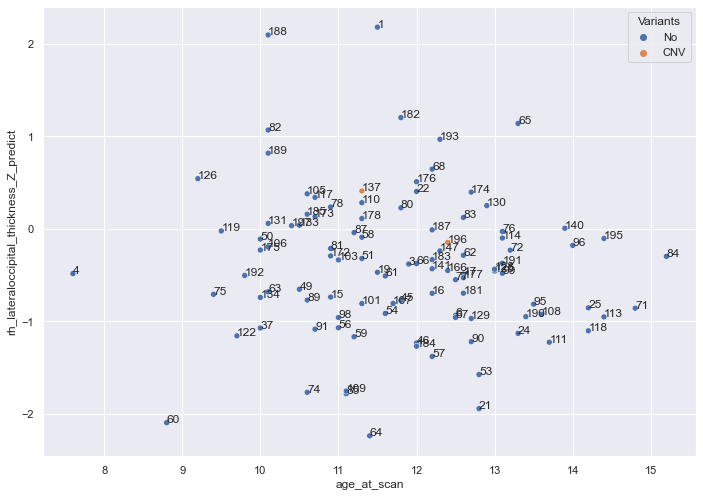

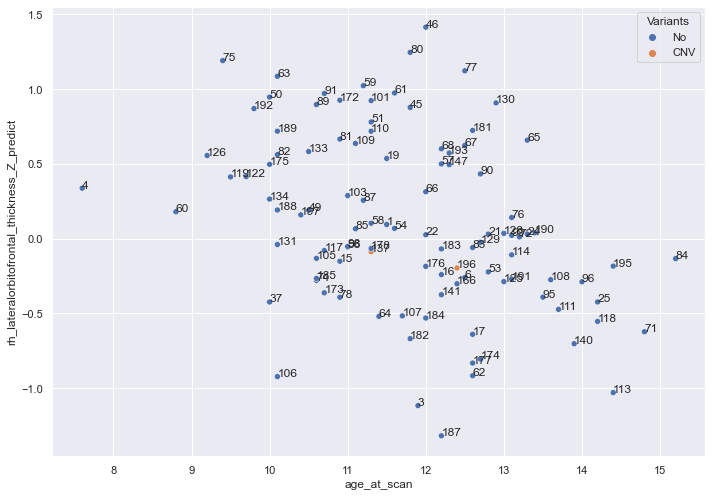

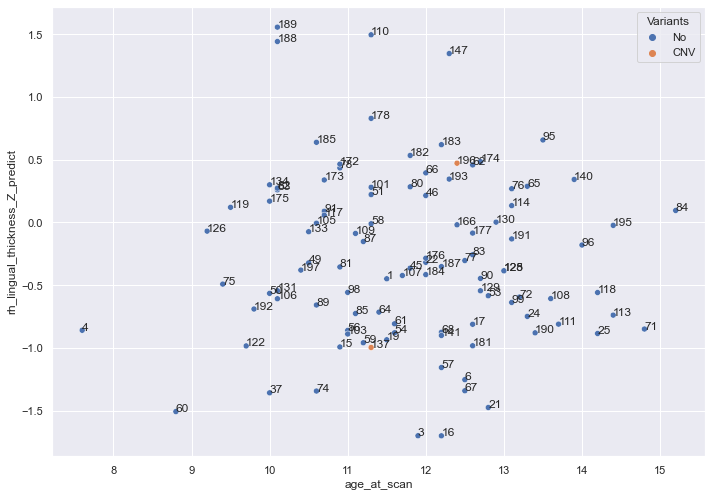

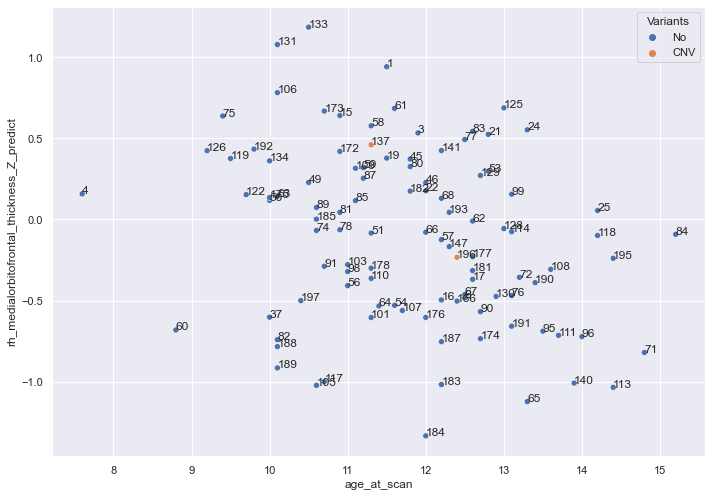

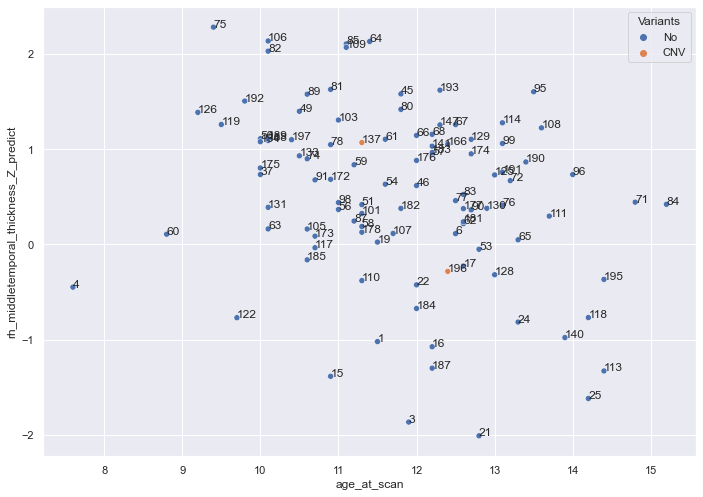

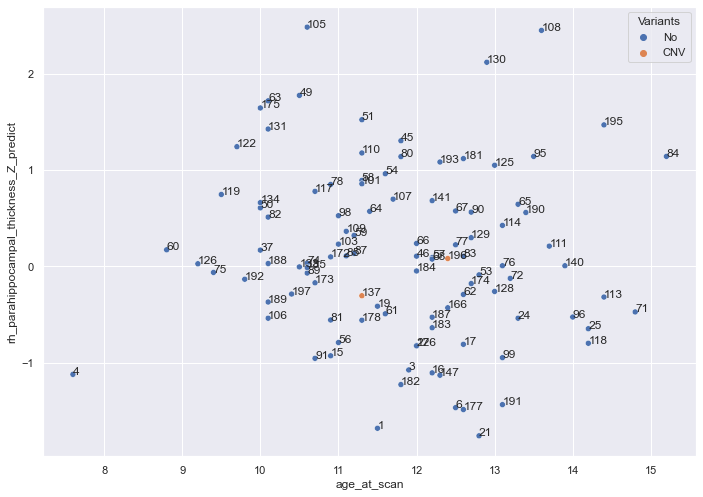

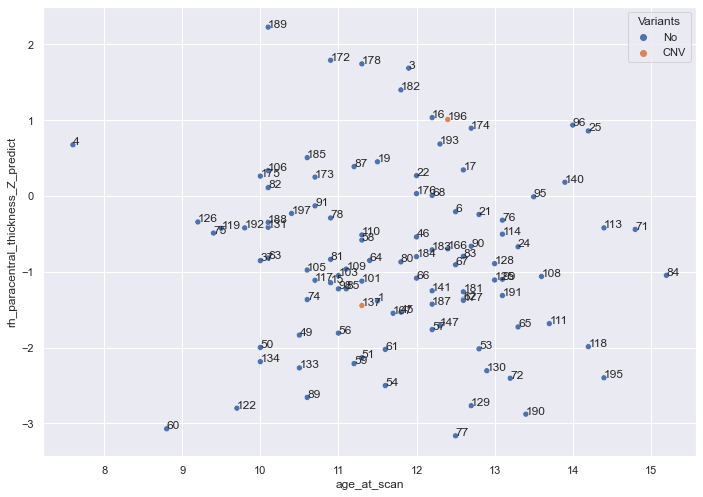

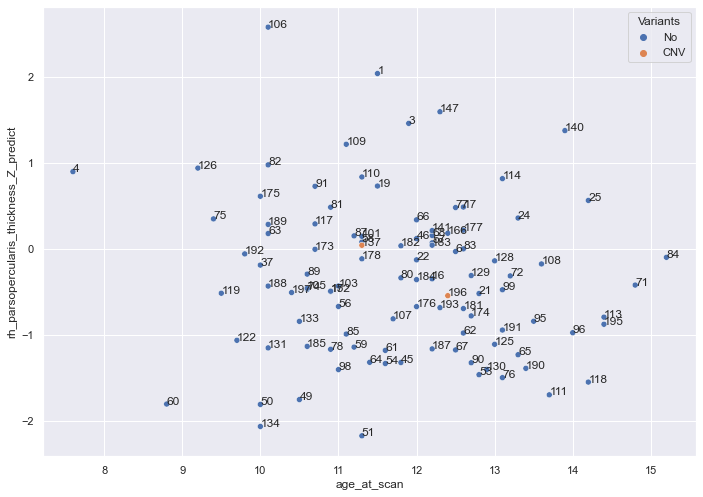

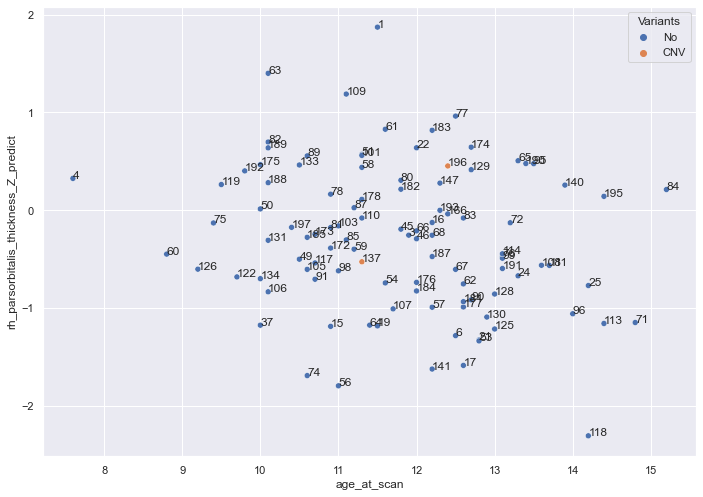

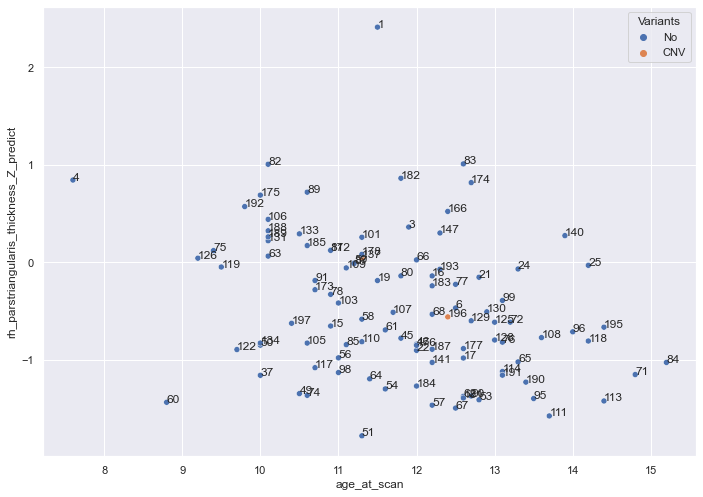

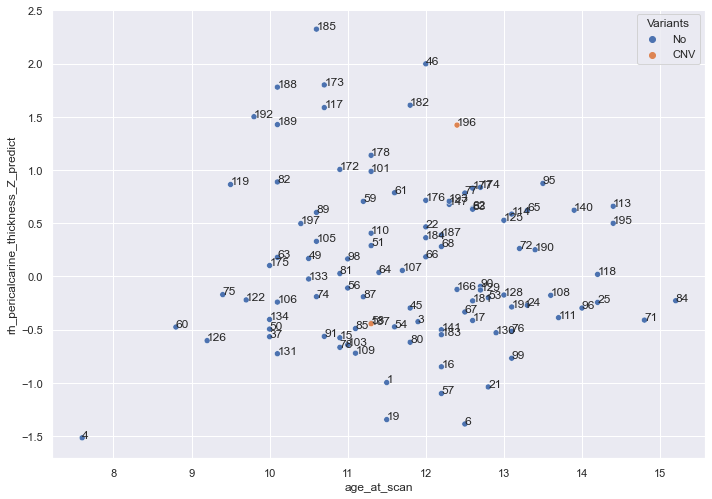

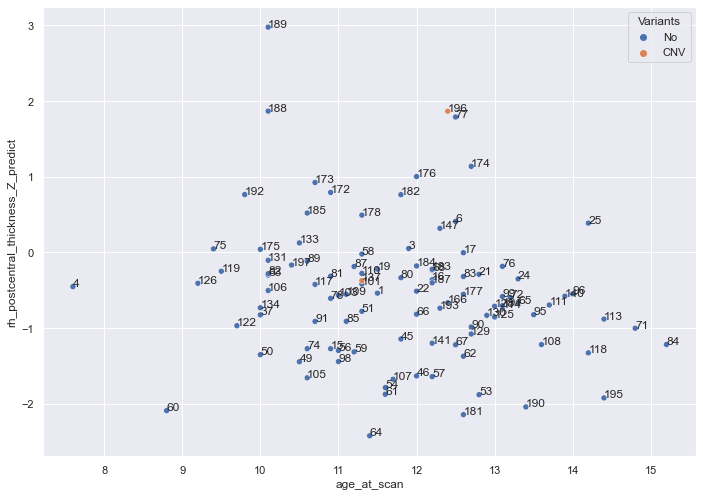

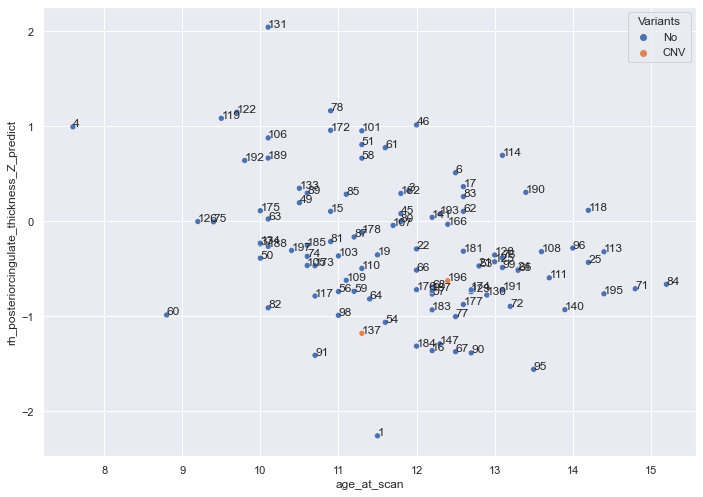

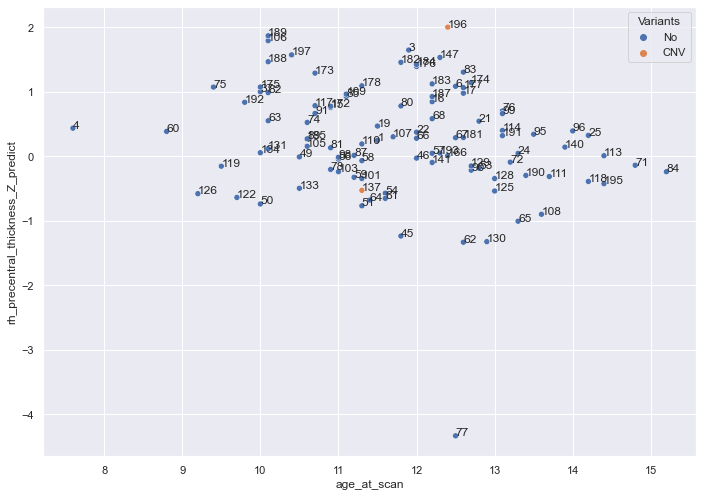

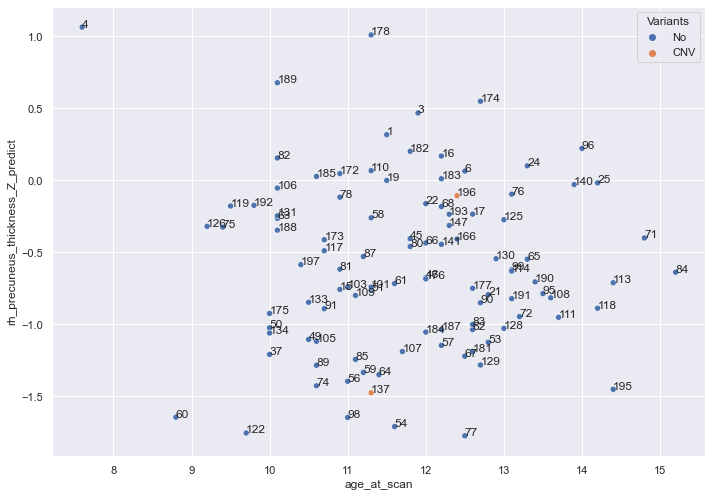

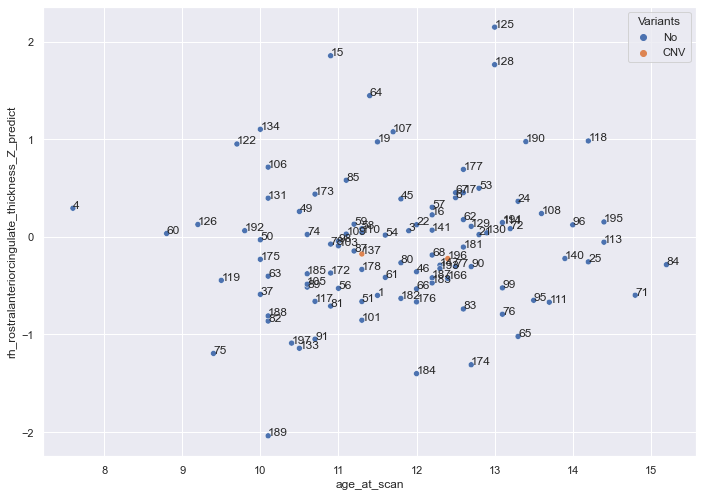

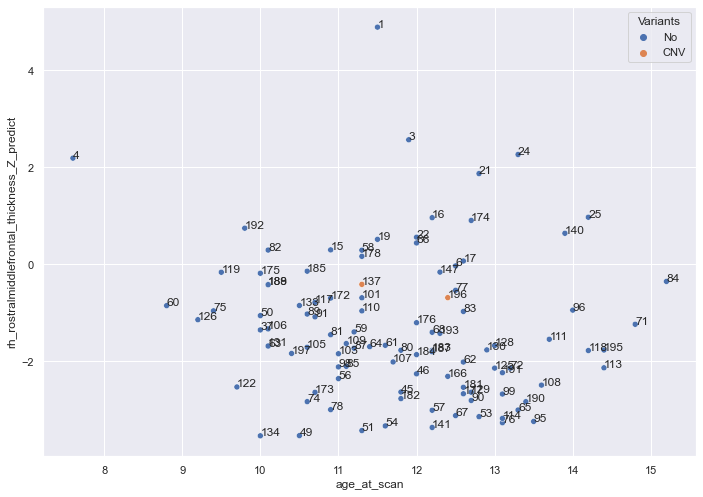

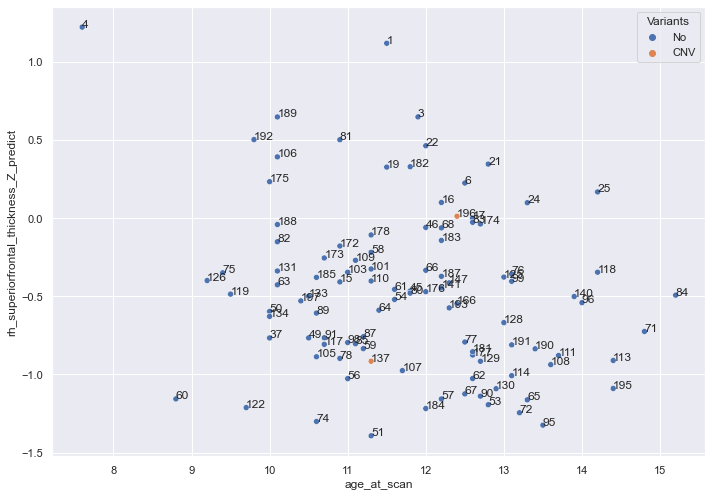

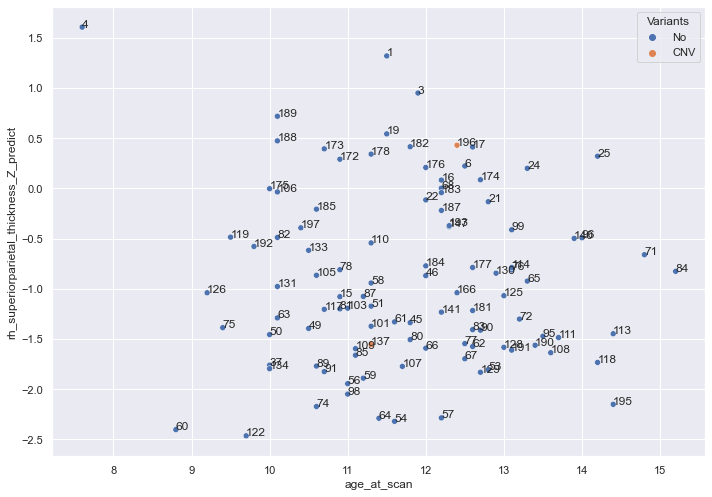

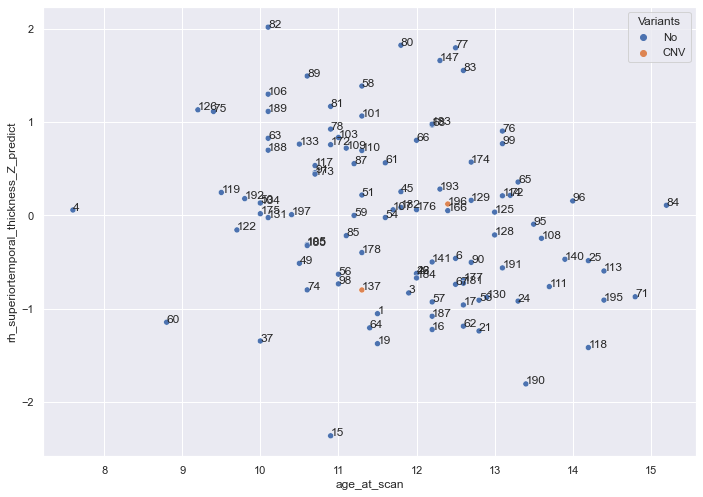

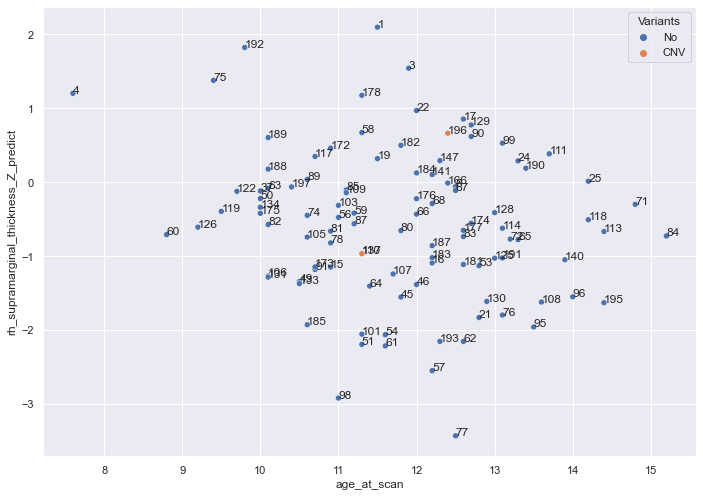

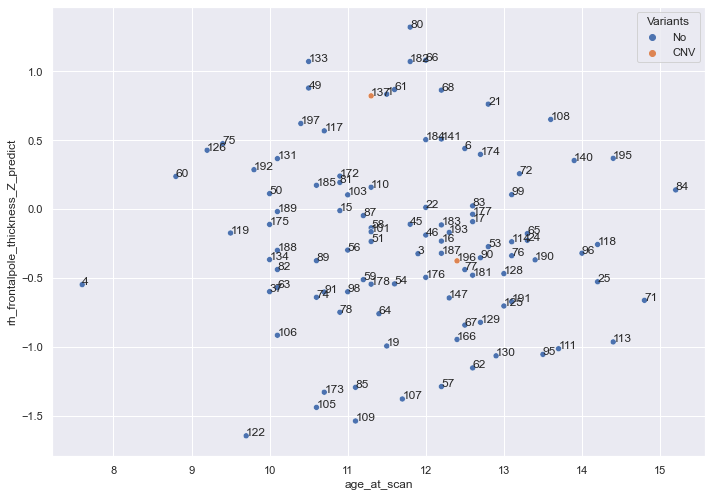

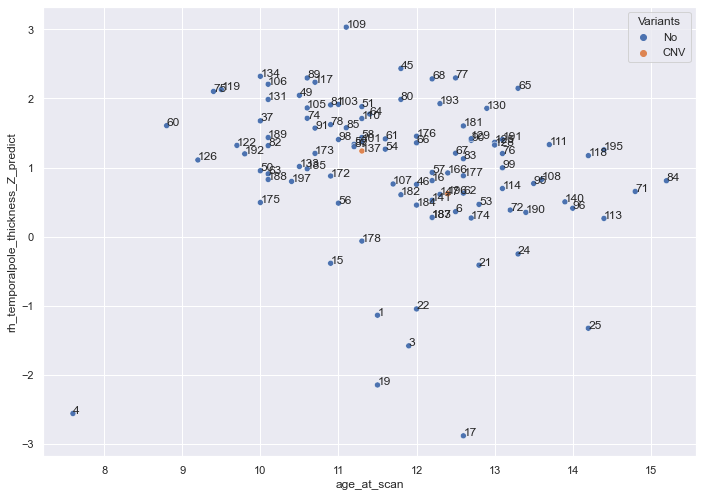

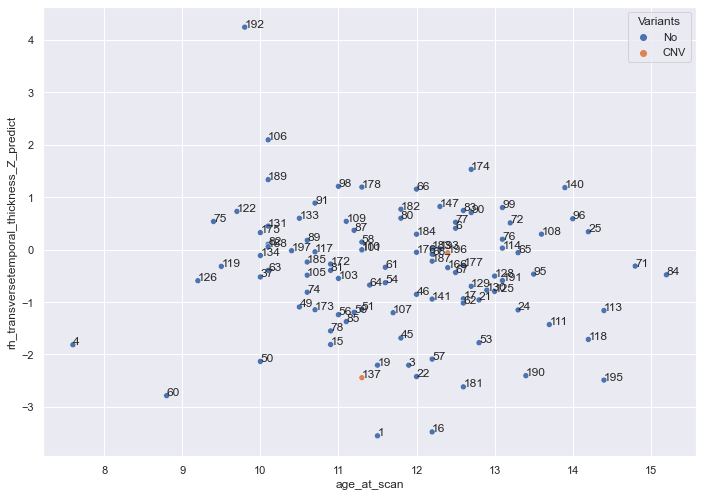

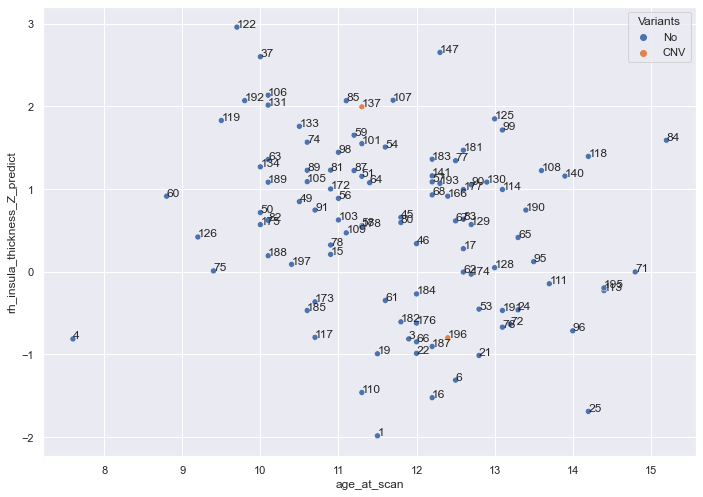

In [113]:
for i in thick:
    sns.scatterplot(y = Ztca[i], x = Ztca['age_at_scan'], hue = Ztca['Variants'])
    label_point(Ztca['age_at_scan'], Ztca[i], Ztca.participant_id.str.split('_', expand=True)[0], plt.gca())


    plt.show()

In [ ]:
sns.scatterplot(x = 'age_at_scan', y = '')

## Import LM Coef

In [48]:
coef = pd.read_csv(os.path.join(data_dir, 'Outputs/coef_tca.csv'))

In [ ]:
mega_corr = []
corr = []
pvall = []
for i in genes:

    corr.append(stats.pearsonr(genes[i], coef.coef)[0])
    pvall.append(stats.pearsonr(genes[i], coef.coef)[1])
    

## Import genes

Genes ano

In [103]:
ano = pd.read_csv(os.path.join(data_dir, 'TCA_vol/gwas_ano.csv'))

12 000 genes

In [118]:
genes = pd.read_csv(os.path.join(data_dir, 'TCA_vol/genes_desikan.csv'))

In [119]:
genes = genes.drop(columns=['Unnamed: 0', 'label'])
genes = genes.loc[:67,]


In [120]:
genes = genes.dropna()

In [107]:
genes = genes[list(set(ano.genes_ano) & set(genes.columns))]

### Correlation with Z-Scores

In [108]:
thick = [col for col in Ztca.columns if 'Z_predict' in col]
thick.remove('rh_frontalpole_thickness_Z_predict')
thick.remove('rh_temporalpole_thickness_Z_predict')

In [109]:
Ztca = Ztca[(Ztca.ASD == 'TCA_ac') | (Ztca.ASD == 'TCA_pr')| (Ztca.ASD == 'TCA')]

In [110]:
mega_corr = []
corr = []
pvall = []
for i in genes:

    corr.append(stats.pearsonr(genes[i], Ztca[thick].mean().values)[0])
    pvall.append(stats.pearsonr(genes[i], Ztca[thick].mean().values)[1])
    

In [111]:
d = pd.DataFrame.from_dict({'r' : corr, 'gene':genes.columns, 'pval':pvall})

In [112]:
d['adj_p'] = statsmodels.stats.multitest.multipletests(pvall, alpha = 0.05, method = 'bonferroni')[0]

In [113]:
d[(d.r > 0.25) & (d.adj_p)]

r    gene          pval  adj_p
1   0.564307   CAMKV  8.027778e-07   True
17  0.411165    MGMT  6.046614e-04   True
47  0.515711    WDR6  9.358501e-06   True
52  0.658681   TRAIP  1.835758e-09   True
60  0.477801  ZNF589  4.970181e-05   True
63  0.590169   CADM1  1.837134e-07   True

### Bootstrap

In [121]:
mega_corr = []
ct = 0
for i in range(500):
    temp_genes = genes.sample(axis='columns', n = 71)
    corr = []
    pvall = []
    for i in temp_genes:

        corr.append(stats.pearsonr(temp_genes[i], Ztca[thick].mean().values)[0])
        pvall.append(stats.pearsonr(temp_genes[i], Ztca[thick].mean().values)[1])
    d = pd.DataFrame.from_dict({'r' : corr, 'gene':temp_genes.columns, 'pval':pvall})
    d['adj_p'] = statsmodels.stats.multitest.multipletests(pvall, alpha = 0.05, method = 'bonferroni')[0]

    if (d[(d.r > 0.25 )& (d.adj_p)].shape[0] >= 6):
        ct += 1
    mega_corr.append(d[(d.r > 0.25 )& (d.adj_p)].shape[0])

In [125]:
ct

392

In [124]:
mega_corr

[13,
 9,
 5,
 12,
 13,
 10,
 10,
 7,
 9,
 3,
 8,
 7,
 7,
 7,
 9,
 6,
 12,
 6,
 9,
 9,
 10,
 6,
 4,
 3,
 7,
 7,
 8,
 11,
 7,
 8,
 5,
 9,
 7,
 5,
 8,
 6,
 4,
 10,
 6,
 8,
 7,
 16,
 5,
 8,
 6,
 5,
 6,
 9,
 4,
 6,
 5,
 11,
 5,
 6,
 4,
 13,
 7,
 6,
 8,
 11,
 7,
 9,
 8,
 8,
 9,
 7,
 4,
 12,
 12,
 7,
 12,
 12,
 7,
 11,
 8,
 5,
 7,
 5,
 11,
 10,
 7,
 8,
 4,
 14,
 4,
 10,
 6,
 8,
 6,
 8,
 5,
 5,
 10,
 9,
 11,
 10,
 9,
 9,
 4,
 5,
 4,
 6,
 5,
 7,
 5,
 9,
 5,
 11,
 7,
 4,
 13,
 6,
 7,
 11,
 7,
 7,
 10,
 9,
 12,
 6,
 6,
 10,
 7,
 6,
 2,
 6,
 9,
 13,
 5,
 7,
 5,
 8,
 7,
 10,
 8,
 6,
 6,
 8,
 10,
 9,
 7,
 5,
 2,
 6,
 9,
 6,
 7,
 5,
 12,
 9,
 10,
 7,
 8,
 12,
 8,
 4,
 7,
 6,
 8,
 7,
 8,
 9,
 8,
 7,
 10,
 4,
 4,
 5,
 8,
 8,
 9,
 10,
 6,
 9,
 10,
 9,
 8,
 8,
 7,
 7,
 6,
 6,
 6,
 8,
 6,
 6,
 6,
 11,
 7,
 7,
 4,
 9,
 7,
 6,
 13,
 10,
 3,
 9,
 7,
 6,
 5,
 7,
 7,
 5,
 7,
 9,
 11,
 7,
 12,
 8,
 7,
 8,
 8,
 4,
 9,
 8,
 5,
 10,
 2,
 8,
 1,
 2,
 14,
 7,
 9,
 7,
 9,
 6,
 6,
 6,
 7,
 7,
 10,
 2,
 7,
 9,
 6,
 5,


In [126]:
sum(mega_corr) / len(mega_corr)

7.506

In [ ]:
for i in range(50):
    

In [429]:
# schizophrenia
# asd
# adhd
# epilepsy
# depression


rgenes = risk_genes('depression')

In [430]:
rgenes = ano.genes_ano

In [431]:
d2[d2.gene.isin(rgenes)].sort_values(ascending= False, by = 'r')

r     gene      pval  adj_p
6149   0.518606     MANF  0.000006  False
5389   0.468636  KLHDC8B  0.000056  False
6428   0.454181     MGMT  0.000100  False
11587  0.430336    TUSC2  0.000249  False
11989  0.395035     WDR6  0.000857  False
10806  0.393584     TCTA  0.000899  False
12283  0.383998  ZMYND10  0.001226  False
9705   0.378301   SHISA5  0.001469  False
3548   0.368476  FAM212A  0.001990  False
11630  0.345783     UBA7  0.003875  False
4160   0.341226    GMPPB  0.004404  False
8535   0.324835    PTBP2  0.006878  False

<AxesSubplot:xlabel='gene', ylabel='r'>

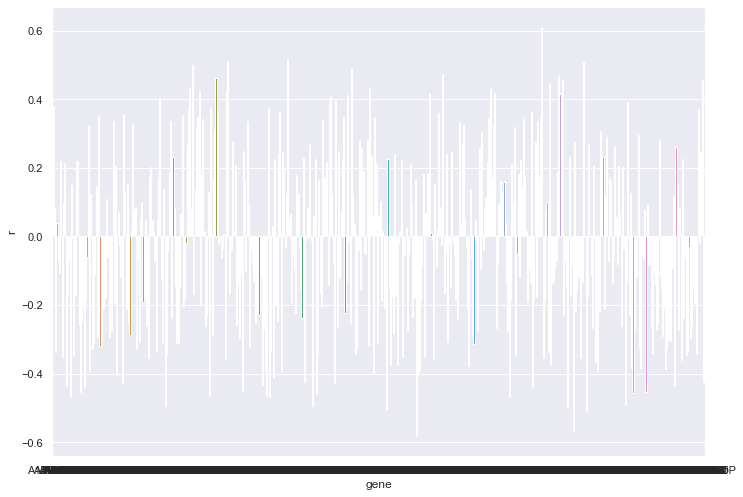

In [174]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data = d.loc[:500, ],  x = 'gene', y = 'r')

In [78]:
coef

Unnamed: 0                                   ROI      pval      coef  \
0            1                 lh_bankssts_thickness  0.690153 -0.053278   
1            2  lh_caudalanteriorcingulate_thickness  0.557137 -0.096893   
2            3      lh_caudalmiddlefrontal_thickness  0.182193  0.133815   
3            4                   lh_cuneus_thickness  0.873459 -0.021672   
4            5               lh_entorhinal_thickness  0.000673  0.480776   
..         ...                                   ...       ...       ...   
63          64            rh_supramarginal_thickness  0.161473 -0.137257   
64          65              rh_frontalpole_thickness  0.503336 -0.099835   
65          66             rh_temporalpole_thickness  0.039516  0.239854   
66          67       rh_transversetemporal_thickness  0.006376 -0.401805   
67          68                   rh_insula_thickness  0.518737  0.075421   

       adj_p          sign  
0   1.000000    Non-signif  
1   1.000000    Non-signif  
2   1.000000    Non-signif  
3   1.000000    Non-signif  
4   0.045737  adj-p < 0.05  
..       ...           ...  
63  1.000000    Non-signif  
64  1.000000    Non-signif  
65  1.000000    Non-signif  
66  0.433587    Non-signif  
67  1.000000    Non-signif  

[68 rows x 6 columns]

In [59]:
top = []
for i in genes.columns:
    top.append(genes[i].astype(float).nlargest(n = 5))

In [60]:
top

[TMEM155    0.928653
 NUAK1      0.910802
 OLFM1      0.905705
 STX1A      0.901984
 NRGN       0.898882
 Name: L_bankssts, dtype: float64,
 SLN       0.936882
 C2CD4C    0.892505
 HSPB3     0.889222
 POLE4     0.883780
 GDA       0.874484
 Name: L_caudalanteriorcingulate, dtype: float64,
 TMEM155    0.930286
 TESPA1     0.925585
 KCNS1      0.919258
 NRGN       0.909568
 NUAK1      0.901853
 Name: L_caudalmiddlefrontal, dtype: float64,
 KCNS1      0.929309
 SOHLH1     0.921443
 RORB       0.916888
 NRGN       0.913531
 TMEM155    0.910920
 Name: L_cuneus, dtype: float64,
 EXOC3L2      0.931436
 KIF21B       0.931193
 LINC02217    0.921161
 CPLX3        0.918523
 ADIRF        0.915956
 Name: L_entorhinal, dtype: float64,
 ENC1       0.907699
 STX1A      0.907631
 TMEM155    0.897162
 OLFM1      0.893181
 RFTN1      0.885333
 Name: L_fusiform, dtype: float64,
 TMEM155    0.923185
 NUAK1      0.900986
 OLFM1      0.894939
 KCNS1      0.892305
 NRGN       0.885615
 Name: L_inferiorparieta